# Week4 - Homework 1

### Complete _todo_ parts in the following:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
def create_df():
    df = pd.DataFrame()
    n = 10000
    x = np.linspace(0, 2*np.pi, n)
    y = 2*np.cosh(x/2) + np.random.normal(0, 3, n)

    x2 = random.choices(['A', 'B'], k=n)

    df['X1'] = x
    df['X2'] = x2
    df['y'] = [ y + 5 if b == 'A' else  y for y, b in zip(y, x2)]
    return df

df = create_df()

In [4]:
df.head()

X1 X2         y
0  0.000000  B  4.434917
1  0.000628  B  0.661726
2  0.001257  B  2.383304
3  0.001885  B  5.556673
4  0.002514  A  8.692243

<Axes: xlabel='X1', ylabel='y'>

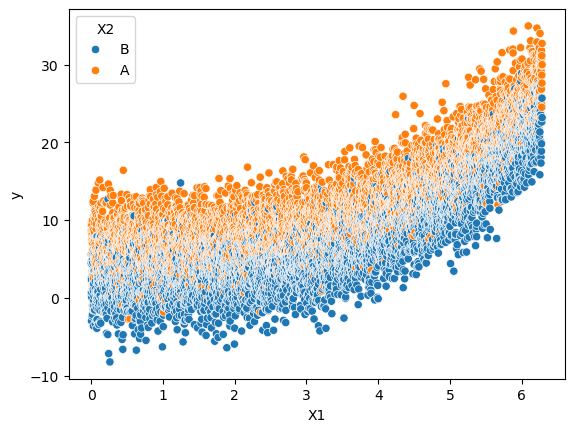

In [5]:
# finding the relationship between X1 and y with hue as X2 for the whole data

sns.scatterplot(data=df, x='X1', y='y', hue='X2')

> There is a linear relationship between X1 and y, with group A generally having higher y values than group B, but there's some overlap between the two groups, especially at lower X1 values.

<Axes: xlabel='X1', ylabel='y'>

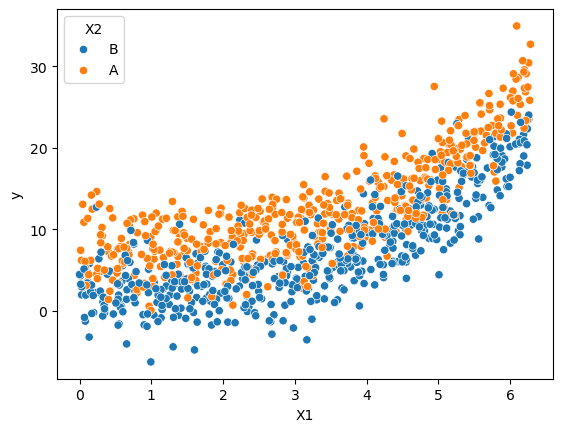

In [7]:
# finding relationship between X1 and y with X2 as hue for a sample data with 1000 rows

sns.scatterplot(data=df.sample(1000), x='X1', y='y', hue='X2')

> As X1 increases, both groups see an increase in y, but the orange group A tends to have higher values than the blue group B at most points along the way.

#### Todo: 
explain findings in the graphs

In [10]:
X = df[['X1', 'X2']]
y = df.y

In [11]:
X.head()

X1 X2
0  0.000000  B
1  0.000628  B
2  0.001257  B
3  0.001885  B
4  0.002514  A

In [12]:
model = LinearRegression()
model.fit(X[['X1']], y)

model.score(X[['X1']], y) 

0.5824293117044627

In [13]:
y_pred = model.predict(X[['X1']])
r2_score( y, y_pred)

0.5824293117044627

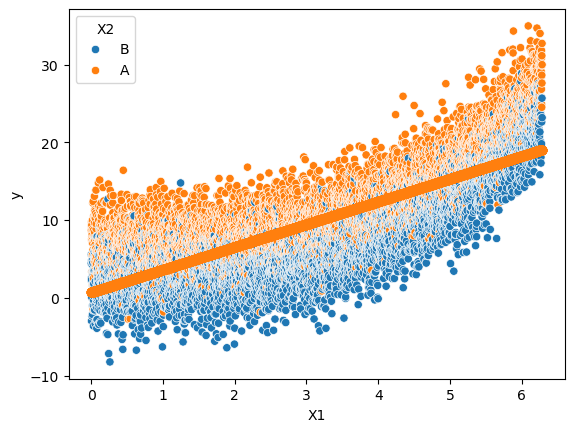

In [14]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X.X1, y) 
# plt.scatter(X.X1, y_pred)

# finding relationship between X1 and y with X2 as hue 
sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
# plotting the predicted value for X1 
plt.scatter(X.X1, y_pred)

> The line shows a linear relationship between X1 and y. Group A and B have more complex patterns that are not fully captured by the straight line.

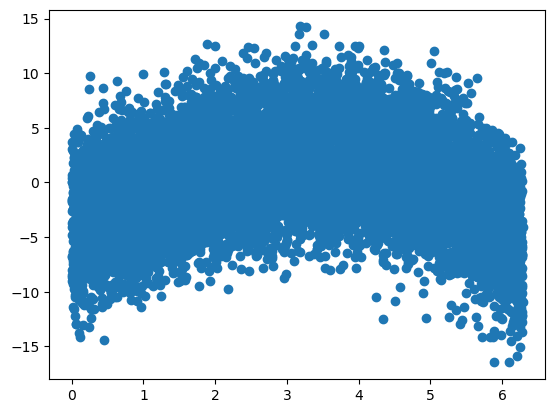

In [16]:
# plotting the difference between the predicted and actual values (residuals) against X1

plt.scatter(X.X1, y_pred-y)

> This graph highlights the difference between the predicted and actual values, with the errors forming a curved shape. This pattern suggests that the model struggles to capture some non-linear trends in the data, leading to more significant errors in certain ranges.

<Axes: >

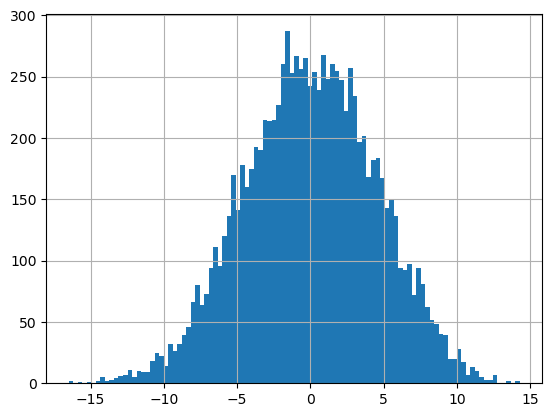

In [18]:
# creating histogram to show the distribution of the residuals 

(y_pred-y).hist(bins=100)

> The plot shows a histogram with a bell-shaped distribution, likely representing data that follows a normal distribution, with most values centered around zero.

- Hypertuning of the data can be done.
- Feature selection can be done.
- It seem like there are a lot of outliers so we can deal with those.

#### Todo: 
Explain findings in the graphs above & what we can try next

In [22]:
# creating a transformer for polynomial features (degree=2), which will add squared terms to the data
transform = PolynomialFeatures(degree=2)

# transform the feature X1 to include its polynomial terms
X_data = transform.fit_transform(X[['X1']])

# initialize a linear regression model
model = LinearRegression()

# fitting the model using the transformed data
model.fit(X_data, y)

# evaluate the model using the R-squared score to measure how well the model explains the variance in y
model.score(X_data, y)


0.6822130505106571

In [23]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.6822130505106571

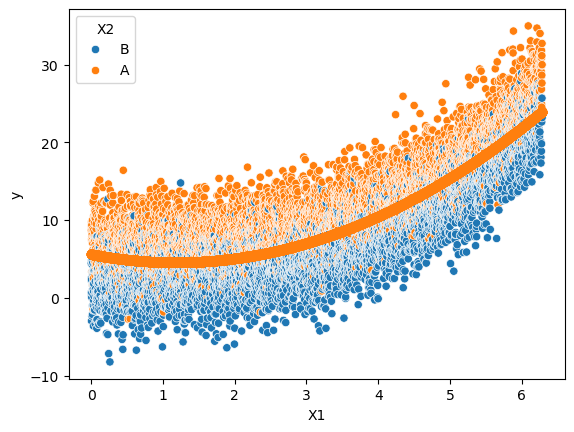

In [24]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X_data[:, 1], y)
# plt.scatter(X_data[:, 1], y_pred)


# scatter plot to find the relationship between X1 and y data points

sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)

>  This graph shows two groups, A and B, both trending upward as X1 increases. The curved line highlights the average relationship between the variables. Interestingly, group B's values climb more steeply than those of group A, suggesting that for group B, changes in X1 lead to larger increases in the response variable (y).

<Axes: >

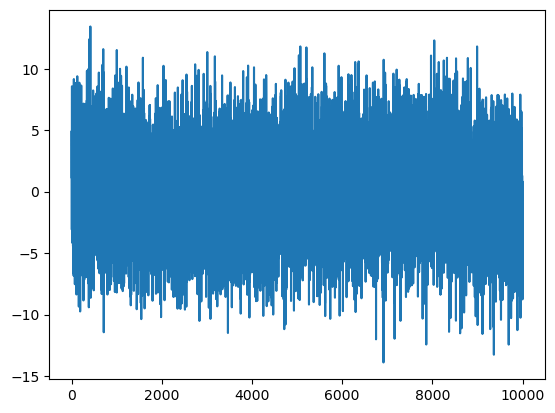

In [26]:
# difference between y_pred and y
(y_pred-y).plot()

> prediction errors over the indices have similar range 

<Axes: >

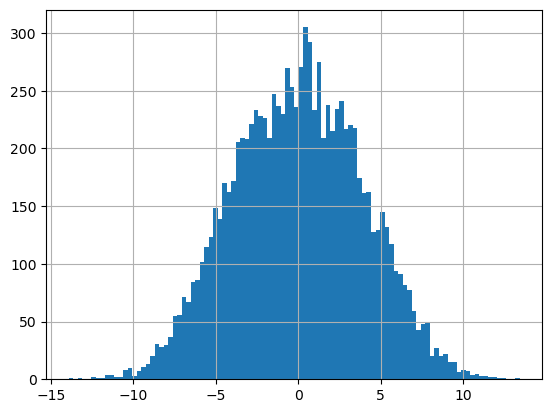

In [28]:
# histogram of the prediction errors

(y_pred-y).hist(bins=100)

> The data have a normal distribution.

### Todo:
Explain findings in the above graphs & what can we do next? 

##  Finally:

In [32]:
## to see the difference (leave these blocks commented when submitting)
# encoder = OneHotEncoder()

# categorical_features = ['X2']
# encoded = encoder.fit_transform(X[categorical_features])

# pd.DataFrame(
#     data=encoded.todense(), 
#     columns=encoder.get_feature_names_out()
# ).head()

In [33]:
encoder = OneHotEncoder(drop='first')

categorical_features = ['X2']
encoded = encoder.fit_transform(X[categorical_features])

In [34]:
encoded_df = pd.DataFrame(
    data=encoded.todense(), 
    columns=encoder.get_feature_names_out()
)

In [35]:
encoded_df.head()

X2_B
0   1.0
1   1.0
2   1.0
3   1.0
4   0.0

In [36]:
# crete a list for X1 features
numerical_features = ['X1']
# join encoded dataframe with numerical feature values of X
X_new = X[numerical_features].join(encoded_df)
# display the top 5 rows of the new dataset
X_new.head()

X1  X2_B
0  0.000000   1.0
1  0.000628   1.0
2  0.001257   1.0
3  0.001885   1.0
4  0.002514   0.0

In [37]:
# initialise the polynimial regression model
poly = PolynomialFeatures()
# fit the model
X_data = poly.fit_transform(X_new)
# initialise the linear regression model
model = LinearRegression()
# fir the model
model.fit(X_data, y)
# evaluate the performance
model.score(X_data, y) 

0.8129956120802662

In [38]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.8129956120802662

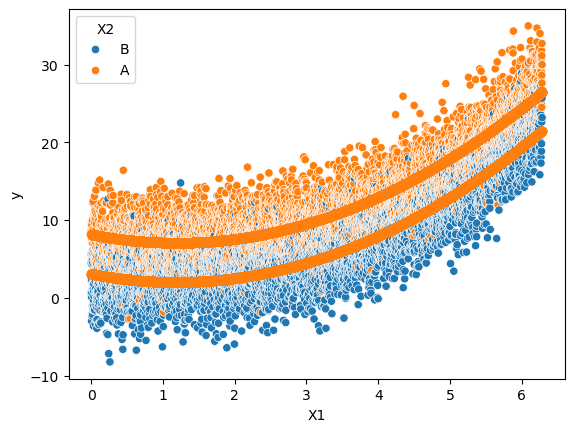

In [39]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X_new.X1, y)
# plt.scatter(X_new.X1, y_pred)

# create a scatter plot for X1 vs y and X2 as hue

sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X_new.X1, y_pred)

> There is a non linear relationship between X1 and y, where the seperation between the classes increases as X1 increases.

<Axes: >

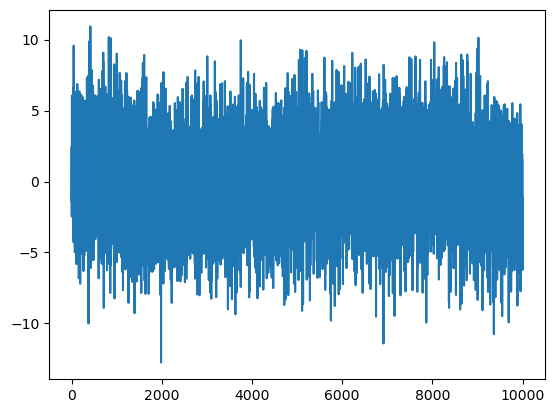

In [41]:
# difference between y_pred and y

(y_pred-y).plot()

> prediction errors over the indices have similar range

<Axes: >

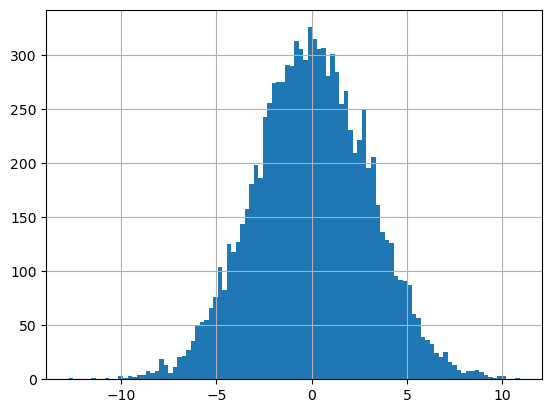

In [43]:
# creating histogram to show errors

(y_pred-y).hist(bins=100)

> The plot shows a histogram with a bell-shaped distribution, likely representing data that follows a normal distribution, with most values centered around zero.

#### Todo: 
explain results

## Create a train-test split

In [47]:
X_training, X_test, y_training, y_test = train_test_split(X, y)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 7,500
Test samples: 2,500


 ## Train a linear regression model
  
 * Perform the model training on training set, follow the steps after `Finally` on the training set. 
 * Get the r2_score on the test set.
 
 Important note: When transforming use `fit_transform` on the training set and use `transform` on the test set.
 
 __eg:__
 
 `encoded_training = encoder.fit_transform(X_train[categorical_features])`
 
 `encoded_testing = encoder.transform(X_test[categorical_features])`
     

In [49]:
X_training.head()

X1 X2
6159  3.870201  B
3004  1.887658  B
3143  1.975003  B
9494  5.965853  B
1056  0.663571  B

In [50]:
# code
# X_training2 = X_training.copy()

# X_training2['isB'] = [ 1 if x == 'B' else 0  for x in X_training['X2']]
# X_training2.drop('X2', axis = 1, inplace=True)
# X_training2.head()

encoder= OneHotEncoder(drop='first')
X_trainingEncoded = encoder.fit_transform(X_training[['X2']])


X_training2 = pd.DataFrame({
    'X1': X_training.X1,
    'X2': X_trainingEncoded.toarray()[:, 0]
})
X_training2.head()


X1   X2
6159  3.870201  1.0
3004  1.887658  1.0
3143  1.975003  1.0
9494  5.965853  1.0
1056  0.663571  1.0

In [51]:
m = LinearRegression().fit(X_training2, y_training)

X_testEncoded = encoder.transform(X_test[['X2']])
X_test2 = pd.DataFrame({
    'X1': X_test.X1,
    'X2': X_testEncoded.toarray()[:, 0]
})
m.score(X_test2, y_test)

0.7019739416835692

## Create a pipeline

Add comments to `todo` parts

In [53]:
#importing the required libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# distinguishing for the categorical and numberical variables
cat_vars = ['X2']
num_vars = ['X1']

# pipeline for numerical variables
num_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2))
])

# pipeline for categorical variables
cat_pipeline = Pipeline([
    ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# combining both the pipelines
processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, num_vars),
    ('cat pipeline', cat_pipeline, cat_vars)
])

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])

print(modeling_pipeline)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])


In [54]:
modeling_pipeline.fit(X_training, y_training)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])

In [55]:
modeling_pipeline.score(X_test, y_test)

0.8047254621225748

## Evaluate/create residual plots

In [57]:
y_pred = modeling_pipeline.predict(X_test)

In [58]:
def plot_residuals(X, y, pipeline, test_size=0.2, random_state=42):
    # splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # fit the pipeline and make predictions
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # calculate residuals
    train_residuals = y_train - y_train_pred
    test_residuals = y_test - y_test_pred
    
    # create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Residual Analysis Plots', fontsize=16)
    
    # 1. Residuals vs Predicted Values
    axes[0, 0].scatter(y_train_pred, train_residuals, alpha=0.5, label='Train')
    axes[0, 0].scatter(y_test_pred, test_residuals, alpha=0.5, label='Test')
    axes[0, 0].axhline(y=0, color='r', linestyle='-')
    axes[0, 0].set_xlabel('Predicted Values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs Predicted Values')
    axes[0, 0].legend()
    
    # 2. Distribution of Residuals
    sns.histplot(train_residuals, kde=True, ax=axes[0, 1], label='Train', alpha=0.5)
    sns.histplot(test_residuals, kde=True, ax=axes[0, 1], label='Test', alpha=0.5)
    axes[0, 1].set_title('Distribution of Residuals')
    axes[0, 1].set_xlabel('Residuals')
    axes[0, 1].legend()
    
    # 3. Q-Q Plot
    from scipy import stats
    stats.probplot(train_residuals, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('Q-Q Plot (Train)')
    
    # 4. Actual vs Predicted
    axes[1, 1].scatter(y_train, y_train_pred, alpha=0.5, label='Train')
    axes[1, 1].scatter(y_test, y_test_pred, alpha=0.5, label='Test')
    axes[1, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    axes[1, 1].set_xlabel('Actual Values')
    axes[1, 1].set_ylabel('Predicted Values')
    axes[1, 1].set_title('Actual vs Predicted')
    axes[1, 1].legend()
    
    plt.tight_layout()
    
    # calculate and print metrics
    from sklearn.metrics import mean_squared_error, r2_score
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    metrics = {
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train R2': train_r2,
        'Test R2': test_r2
    }
    
    return fig, metrics

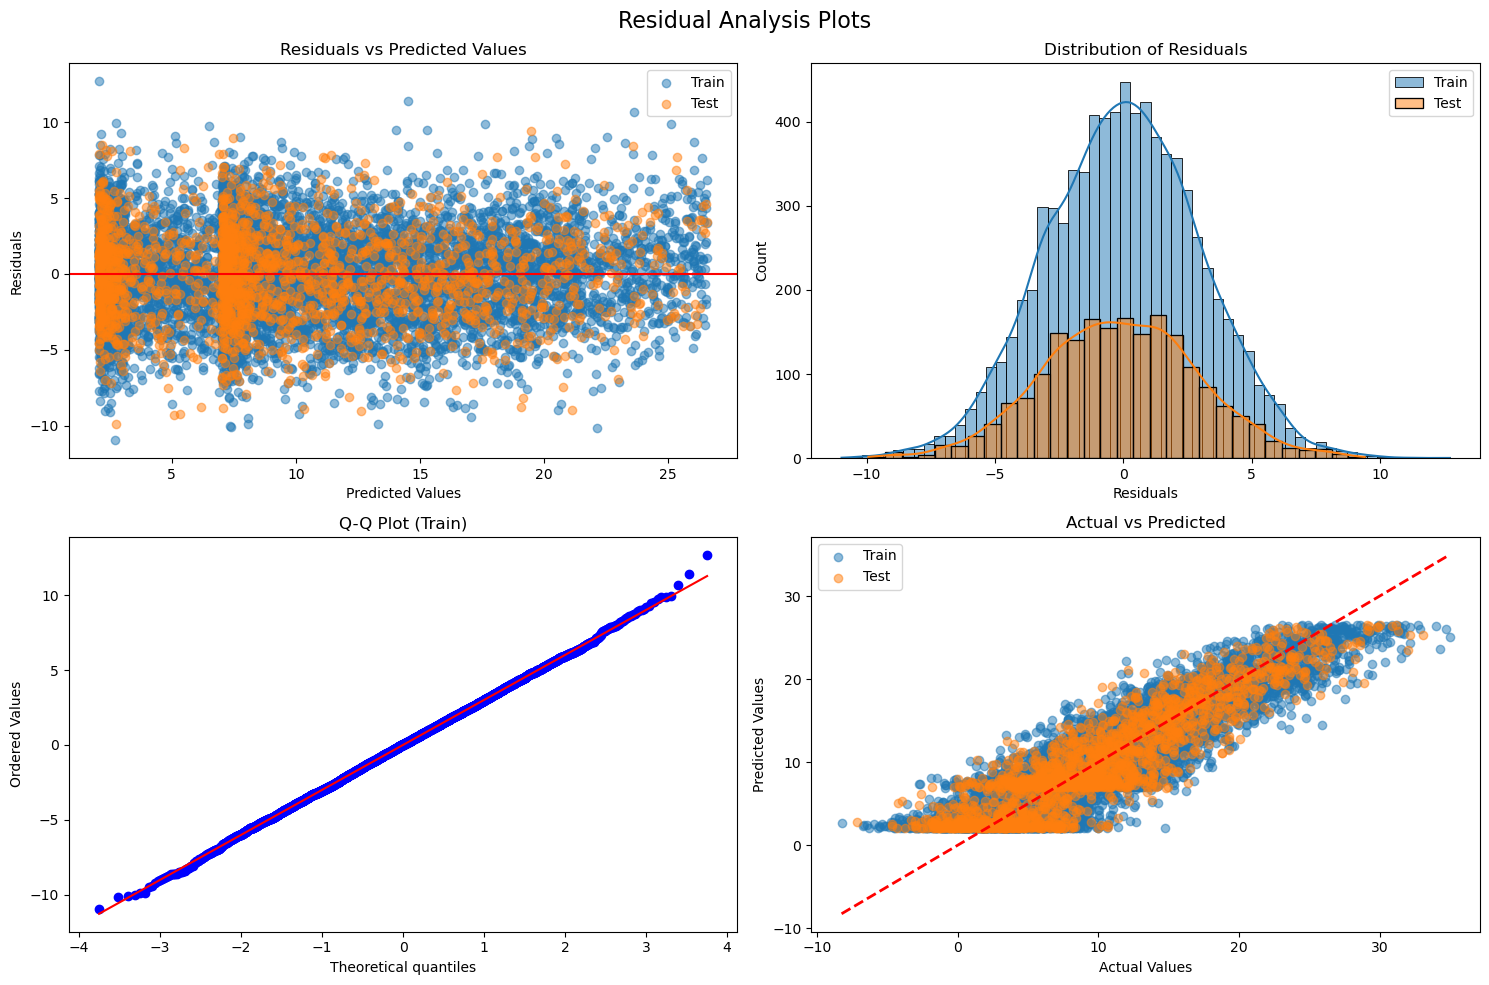

Metrics: {'Train MSE': 9.023741089242204, 'Test MSE': 9.048479468220775, 'Train R2': 0.8149179649689603, 'Test R2': 0.8043694938703233}


In [59]:
# create and plot the residuals
fig, metrics = plot_residuals(X, y, modeling_pipeline)
plt.show()
print("Metrics:", metrics)

## Explain findings

Explain findings

>- The model shows decent overall fit with normal error distribution, but has inconsistent prediction accuracy across different value ranges.
>- The model explains about 79-81% of variance but consistently underestimates higher values and overestimates lower ones.